# Perceptron - linear regression with gradient descent (solution)

This code implements a single neuron (perceptron) for linear regression using stochastic gradient descent.

Reminder: Linear regression is used to map input (independent) variables with the output (dependent) variable, so that it can be used for prediction of the output values on the unseen data.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

For the purpose of this exercise, only two features (sepal length and sepal width) of one specie of flowers (Setosa) were used.


In [1]:
# allows inline plotting below each cell
%matplotlib inline

In [2]:
# import necessary libraries 
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython import display

In [3]:
# function that plots data and regression line
def plot_regression(w1, b, data, fig):
    
    plt.axis([0, 7, 0, 5])
    plt.grid()
    
    # scatter data
    for i in range(len(data)) :
        point = data[i]
        color = "b"
        plt.scatter(point[0], point[1], c=color)

    # linear regression line
    x = np.linspace(0,7,100)
    plt.plot(x, w1*x+b, '-r', label='y=w1*x+b')
    plt.show()

In [4]:
# each point is a tuple (sepal length, sepal width)
data = np.array([[5.1, 3.5],
 [4.9, 3. ],
 [4.7, 3.2],
 [4.6, 3.1],
 [5. , 3.6],
 [5.4, 3.9],
 [4.6, 3.4],
 [5. , 3.4],
 [4.4, 2.9],
 [4.9, 3.1],
 [5.4, 3.7],
 [4.8, 3.4],
 [4.8, 3. ],
 [4.3, 3. ],
 [5.8, 4. ],
 [5.7, 4.4],
 [5.4, 3.9],
 [5.1, 3.5],
 [5.7, 3.8],
 [5.1, 3.8]])

mystery_flower = [ 6.6,  3]

# print(data)

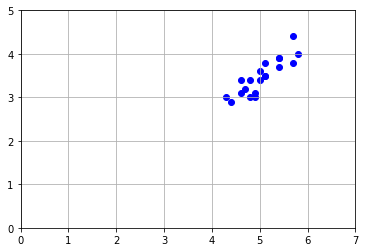

In [5]:
### visualize data ###

plt.axis([0, 7, 0, 5])
plt.grid()
for i in range(len(data)) :
    point = data[i]
    color = "b"
    plt.scatter(point[0], point[1], c=color)

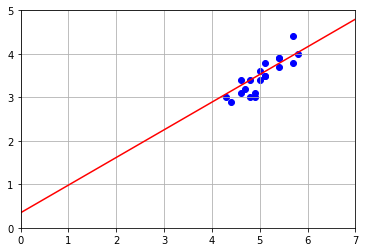

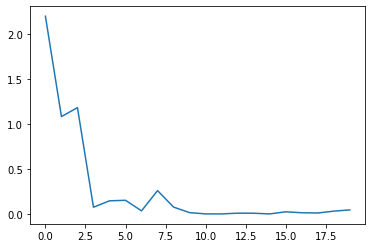

In [6]:
### training loop ###

learning_rate = 0.005
costs = []

fig = plt.figure()

# initialize weights and bias
w1 = np.random.randn()
b = np.random.randn()

# learn new weights
for i in range(20) :
    ri = np.random.randint(len(data))
    point = data[ri]

    prediction = point[0] * w1 + b
    
    target = point[1]
    
    # cost function
    cost = np.square(prediction - target)
    
    # derivative of the cost function
    dcost_prediction = 2 * (prediction - target)
    
    # For the derivatives of the weights 
    # it’s the inputs values because they are constants 
    # And for the derivative of the Bias it’s 1
    dz_dw1 = point[0]
    dz_db = 1
    
    # gradient of the cost function
    dcost_dz = dcost_prediction
    
    # gradient of the weights & bias
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_db = dcost_dz * dz_db
    
    # update weights and bias
    w1 = w1 - learning_rate * dcost_dw1
    b = b - learning_rate * dcost_db
    
    # plot the regression line
    plot_regression(w1, b, data, fig)
    display.clear_output(wait=True)
    time.sleep(1.0)
    
    # compute cost
    if i % 1 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]            
            prediction = point[0] * w1 + b          
            target = point[1]
            cost_sum += np.square(prediction - target)            
        costs.append(cost_sum/len(data)) 

# plot the final regression line
plot_regression(w1, b, data, fig)

# plot costs
plt.plot(costs)

In [8]:
### evaluate solution ###

# use R2 score
y_pred = np.multiply(data[:,0], w1) + b
y_actual = data[:,1]

# sum of square of residuals
ssr = np.sum((y_pred - y_actual)**2)
print('ssr: ', ssr)

#  total sum of squares
sst = np.sum((y_actual - np.mean(y_actual))**2)
print('sst: ', sst)

# R2 score
r2_score = 1 - (ssr/sst)
print('r2_score: ', r2_score)


ssr:  0.9636091741836356
sst:  3.152
r2_score:  0.694286429510268
